##Introduction

This notebook was created for course MK842 - Machine Learning for Business Analytics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

##About the df:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality


Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 3 and 8)

##Data Preprocessing & Exploration


In [4]:
df.shape

(1143, 13)

In [5]:
#ensuring no null values and dtype for each col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
#replace spaces in df col names with underscore
df.columns = [name.replace(' ', '_') for name in df.columns]

In [9]:
def col_stats(df, col):
    """
    Print statistics for a given column in a DataFrame.
    Returns:
    None: Prints the statistics of the column.
    """
    if col not in df.columns:
        print(f"Column '{col}' not found in the DataFrame.")
        return

    max_val = df[col].max()
    min_val = df[col].min()
    avg_val = df[col].mean()
    count_max = df[df[col] == max_val].shape[0]
    count_min = df[df[col] == min_val].shape[0]

    print(f'Column: {col}')
    print(f'  Max: {max_val}')
    print(f'  Count of Max: {count_max}')
    print(f'  Min: {min_val}')
    print(f'  Count of Min: {count_min}')
    print(f'  Average: {avg_val}\n')

In [10]:
print('Min:',df.citric_acid.min())
print('Max:',df.citric_acid.max())

Min: 0.0
Max: 1.0


In [11]:
#we do not expect density to fall above 1
print('Min:',df.density.min())
print('Max:',df.density.max())

Min: 0.99007
Max: 1.00369


In [12]:
high_density_df = df[df['density'] > 1]

# shape of high density df
high_density_df.shape

(55, 13)

In [13]:
high_density_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
170,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,243
171,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,244
189,8.1,0.87,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4,266
202,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5,284
203,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5,285


We would not expect wine density to fall above 1; however, it is possible that wine density can be greater than one do to higher residual sugars present after the fermentation process.

In [14]:
col_stats(df, 'density')
col_stats(df, 'residual_sugar')

Column: density
  Max: 1.00369
  Count of Max: 1
  Min: 0.99007
  Count of Min: 1
  Average: 0.9967304111986001

Column: residual_sugar
  Max: 15.5
  Count of Max: 1
  Min: 0.9
  Count of Min: 1
  Average: 2.5321522309711284



In [15]:
col_stats(high_density_df, 'residual_sugar')

Column: residual_sugar
  Max: 15.5
  Count of Max: 1
  Min: 1.8
  Count of Min: 1
  Average: 4.590909090909092



Because the high density wine subset contain higher average residual sugar values, we are comfortable leaving the high density wines in the dataset. If the high density wines >1 did not have an average residual sugar content higher than wines with a density < 1, we would need to investigate further.

In [16]:
print('Min:',df.alcohol.min())
print('Max:',df.alcohol.max())

Min: 8.4
Max: 14.9


In [17]:
col_stats(df, 'density')

Column: density
  Max: 1.00369
  Count of Max: 1
  Min: 0.99007
  Count of Min: 1
  Average: 0.9967304111986001



In [18]:
for col in df.columns[2:3]:
    max_val = df[col].max()
    min_val = df[col].min()
    avg_val = df[col].mean()
    count_max = df[df[col] == max_val].shape[0]
    count_min = df[df[col] == min_val].shape[0]

    print(f'Column: {col}')
    print(f'  Max: {max_val}')
    print(f'  Count of Max: {count_max}')
    print(f'  Min: {min_val}')
    print(f'  Count of Min: {count_min}')
    print(f'  Average: {avg_val}\n')
print('Lenght of Col:',len(df.citric_acid))


Column: citric_acid
  Max: 1.0
  Count of Max: 1
  Min: 0.0
  Count of Min: 99
  Average: 0.2683639545056868

Lenght of Col: 1143


##Exploratory Analysis

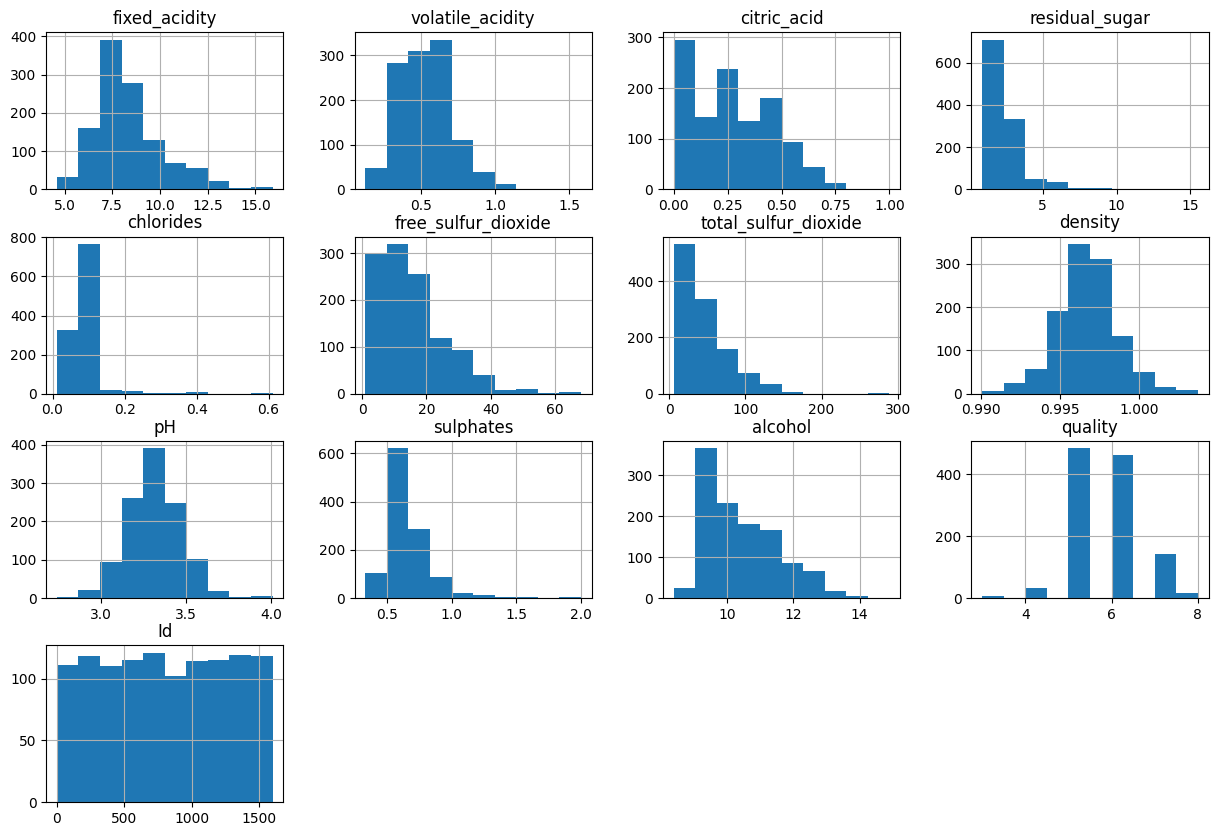

In [19]:
#histogram to see distribution of vals in each col
df.hist(bins=10, figsize=(15, 10))
plt.show()

In [20]:
quality_max = df.quality.max()
quality_min = df.quality.min()
print(f'Quality Score Range:{quality_min,quality_max}')

Quality Score Range:(3, 8)


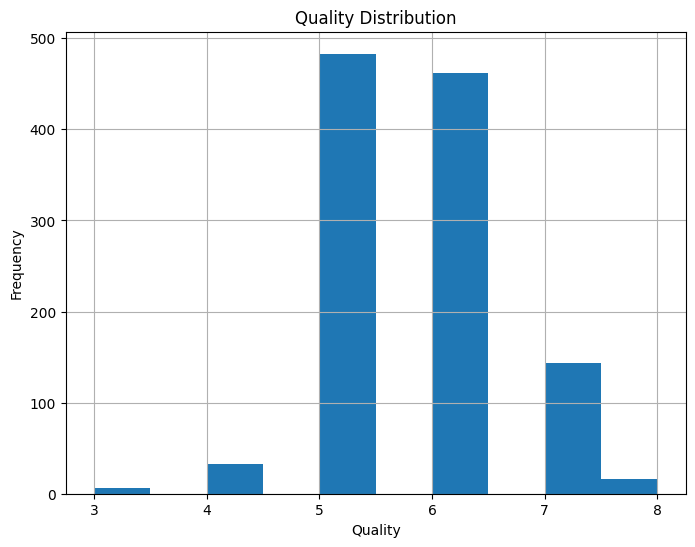

In [21]:
df.quality.hist(bins=10, figsize=(8,6), rwidth=1)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution')
plt.show()

In [22]:
print('Quality Range',np.sort(df.quality.unique()))

Quality Range [3 4 5 6 7 8]


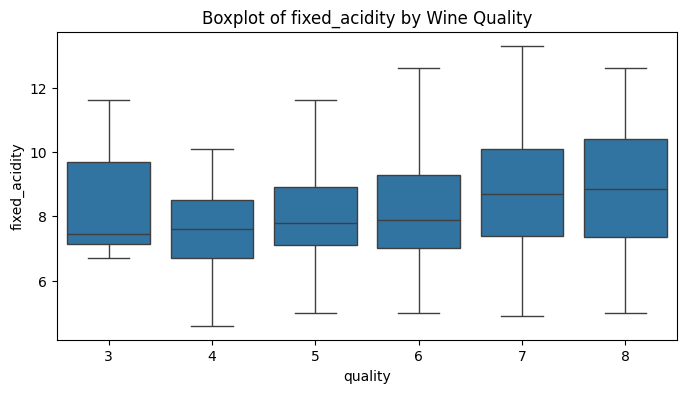

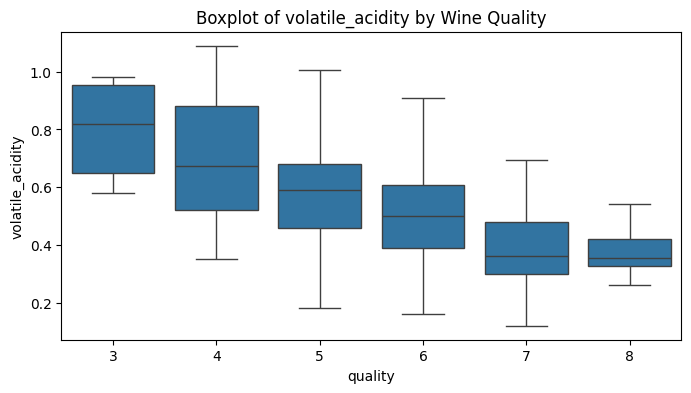

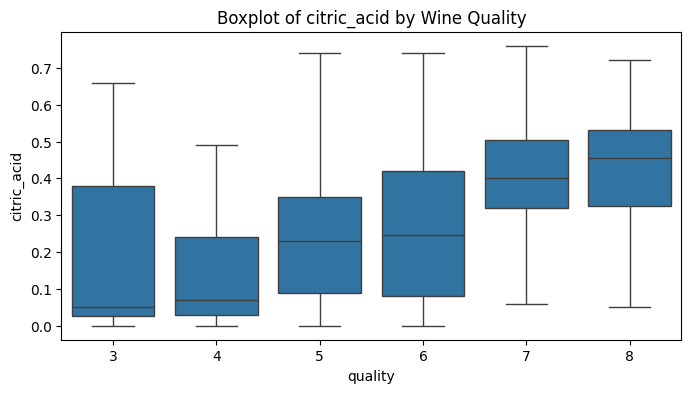

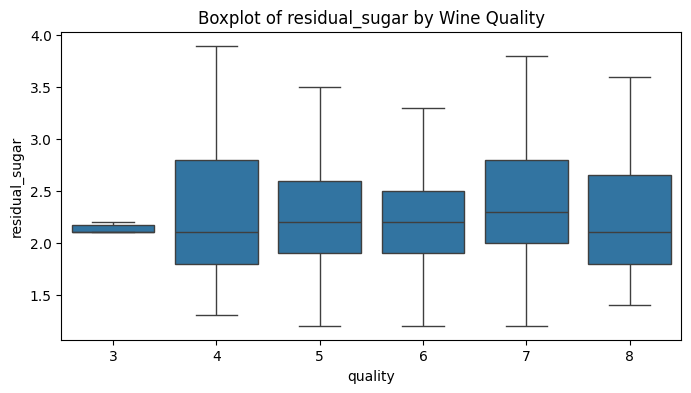

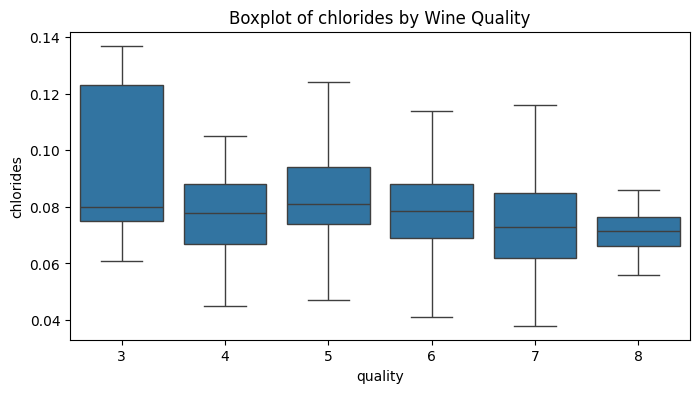

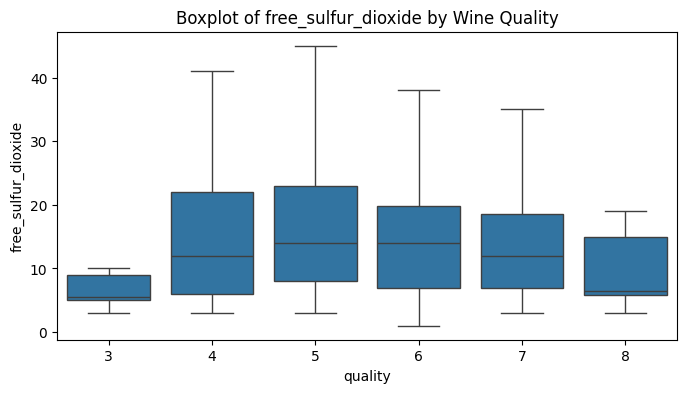

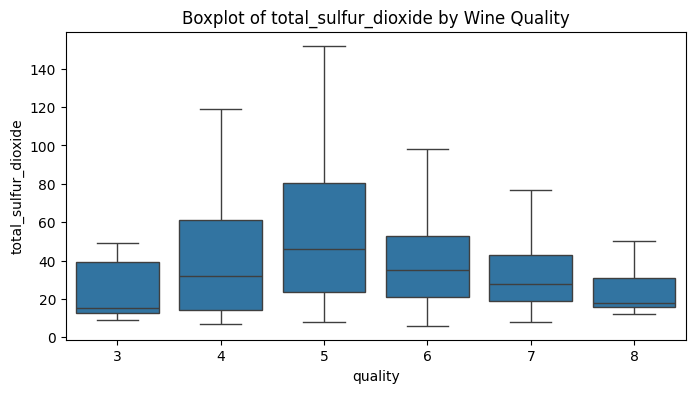

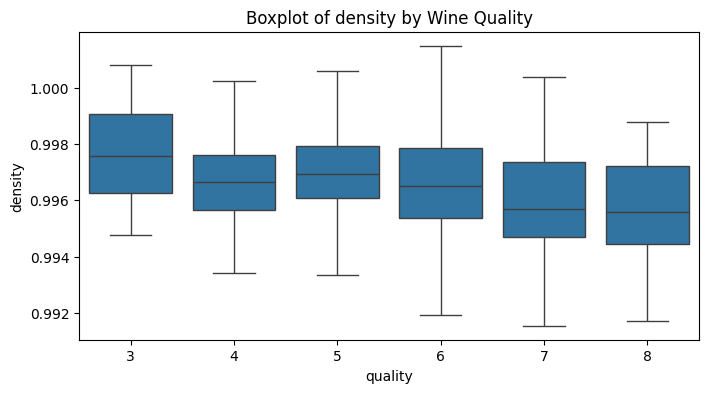

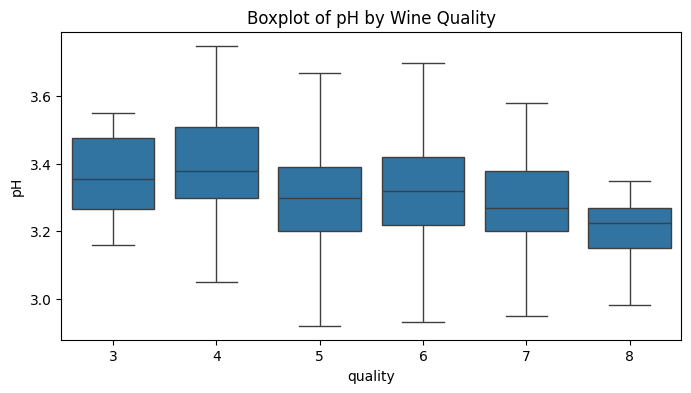

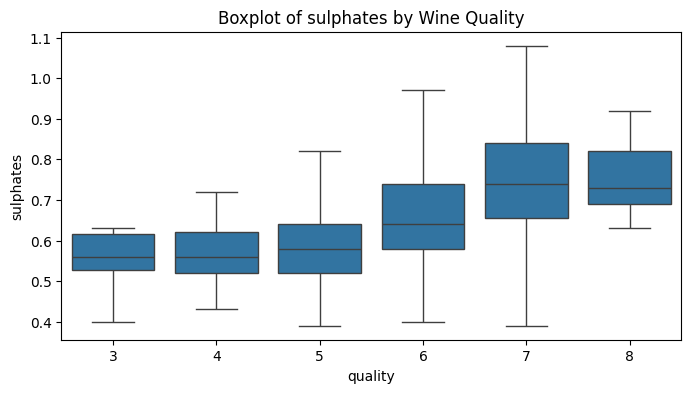

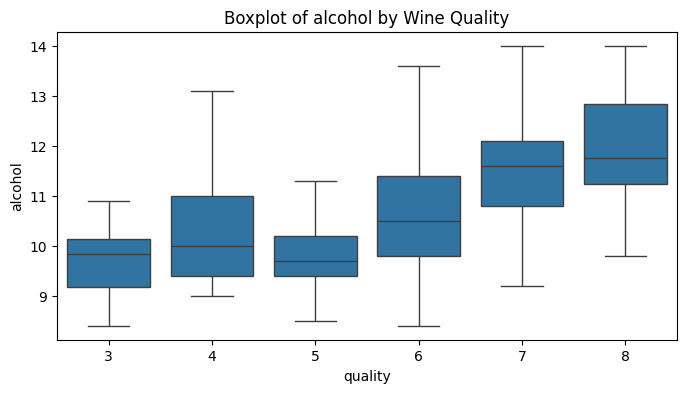

In [23]:
for col in df.columns[:-2]: #excluding the ID and quality column
  plt.figure(figsize=(8,4))
  sns.boxplot(x='quality', y=col, data=df, showfliers=False) #Turned off fliers (outliers)
  plt.title(f'Boxplot of {col} by Wine Quality')
  plt.show()

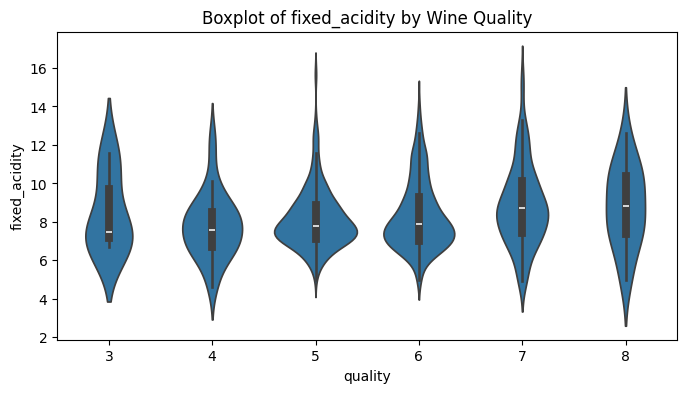

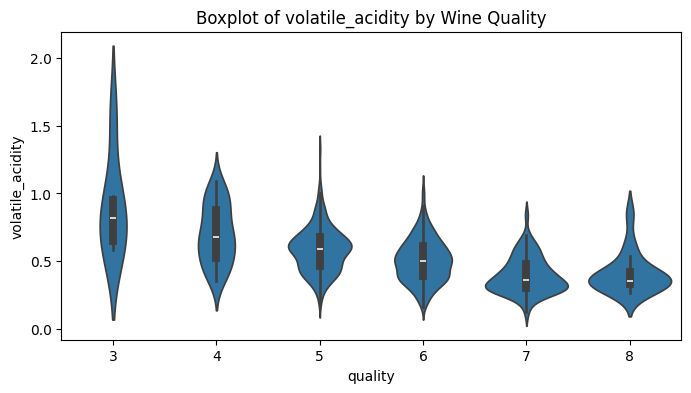

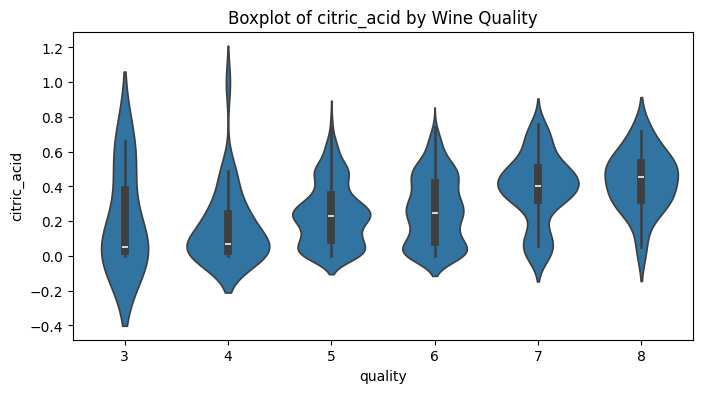

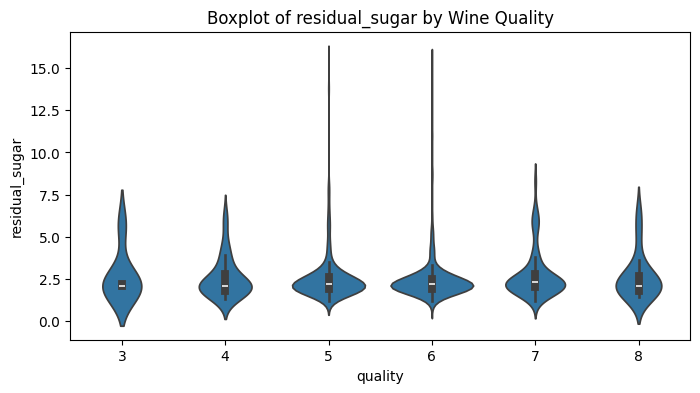

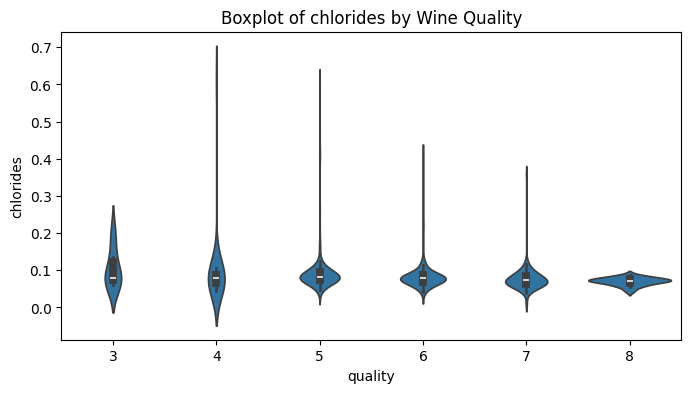

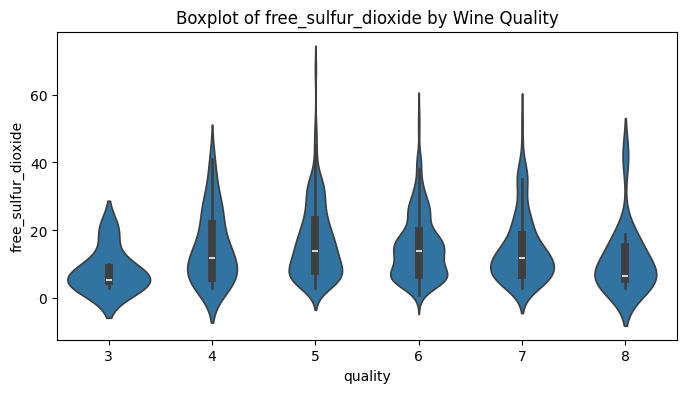

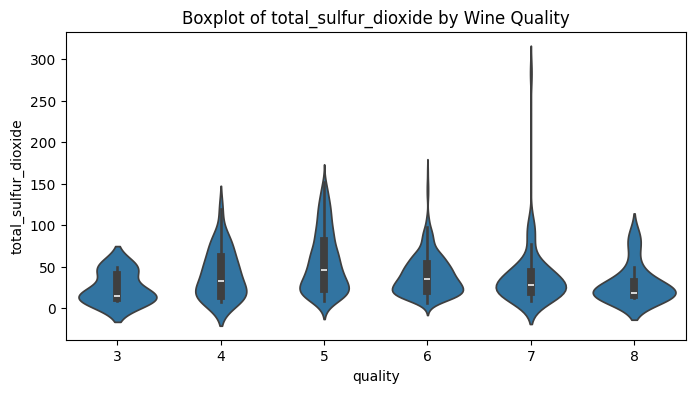

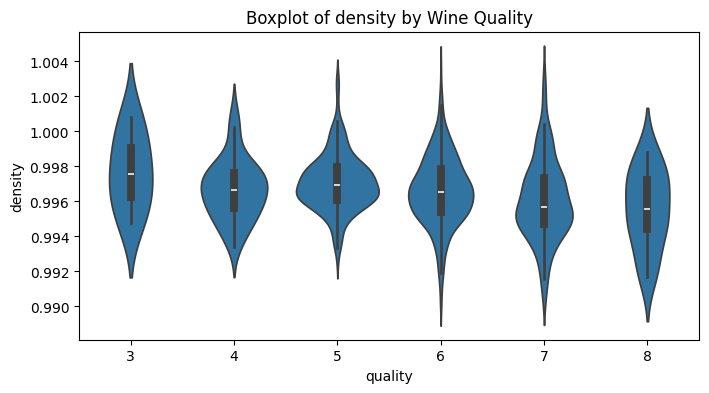

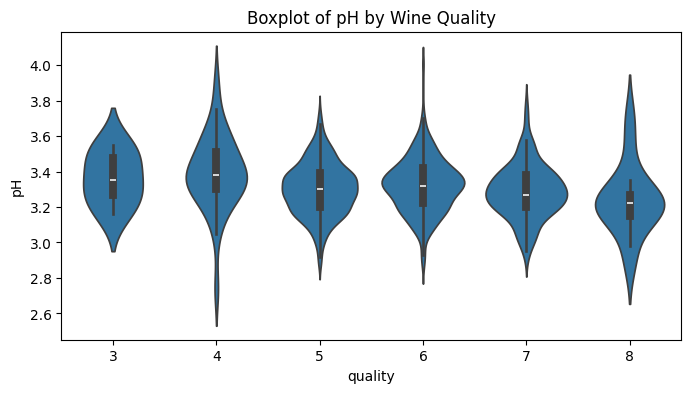

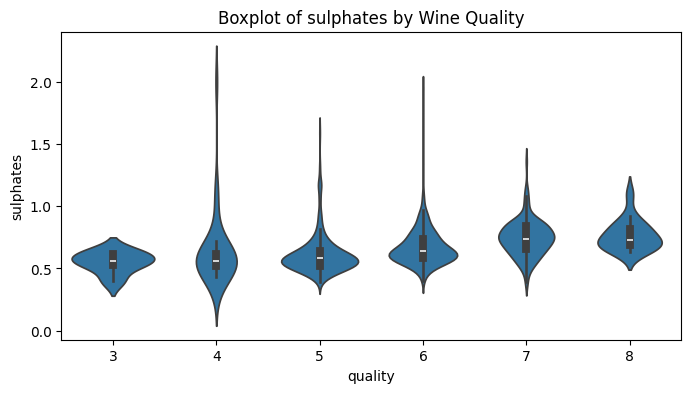

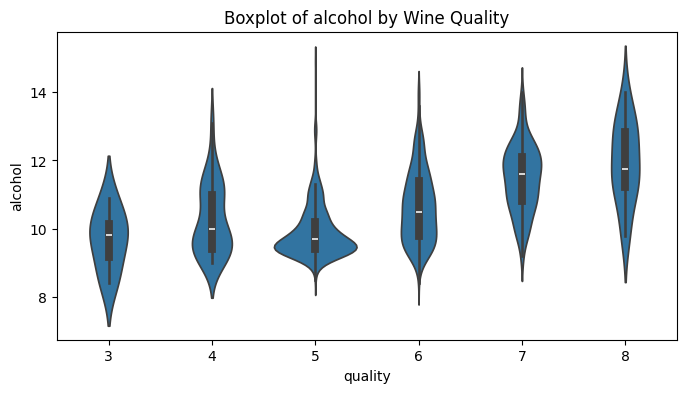

In [24]:
for col in df.columns[:-2]: #excluding the ID and quality column
  plt.figure(figsize=(8,4))
  sns.violinplot(x='quality', y=col, data=df)
  plt.title(f'Boxplot of {col} by Wine Quality')
  plt.show()

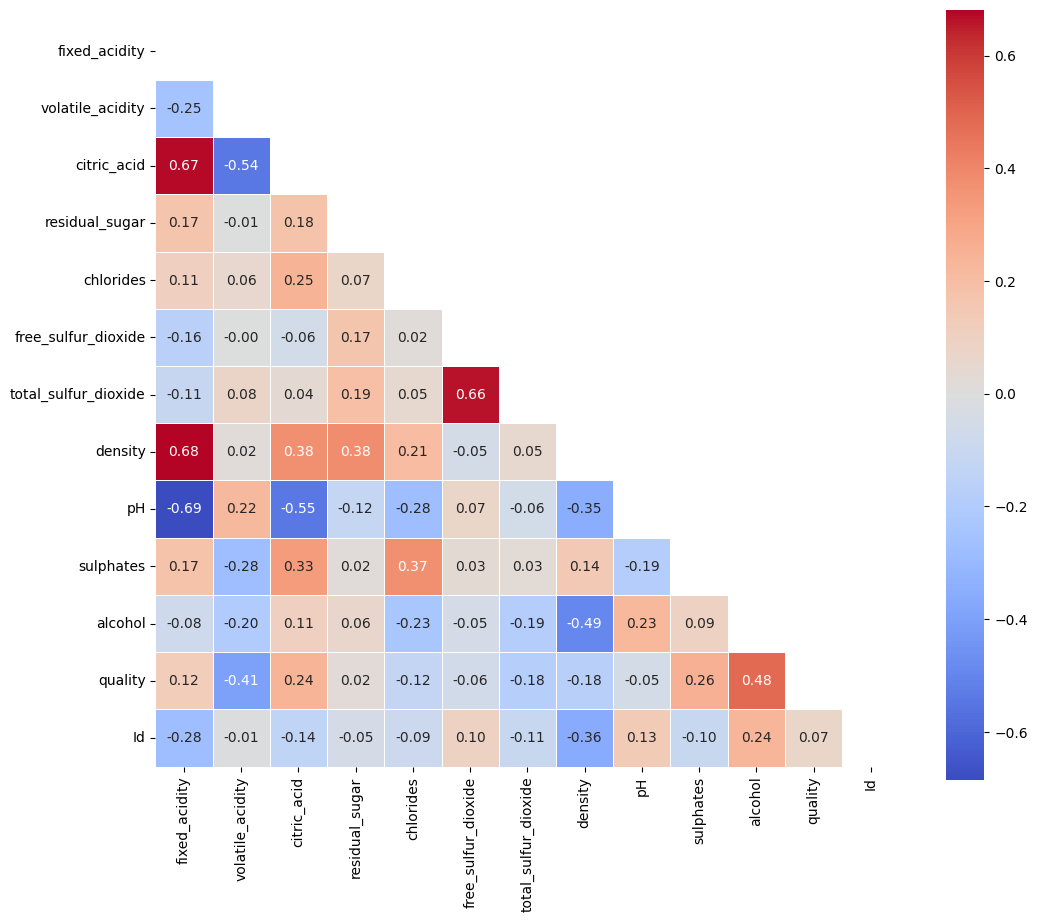

In [25]:
#calculate correlational matrix
corr = df.corr()
#create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()


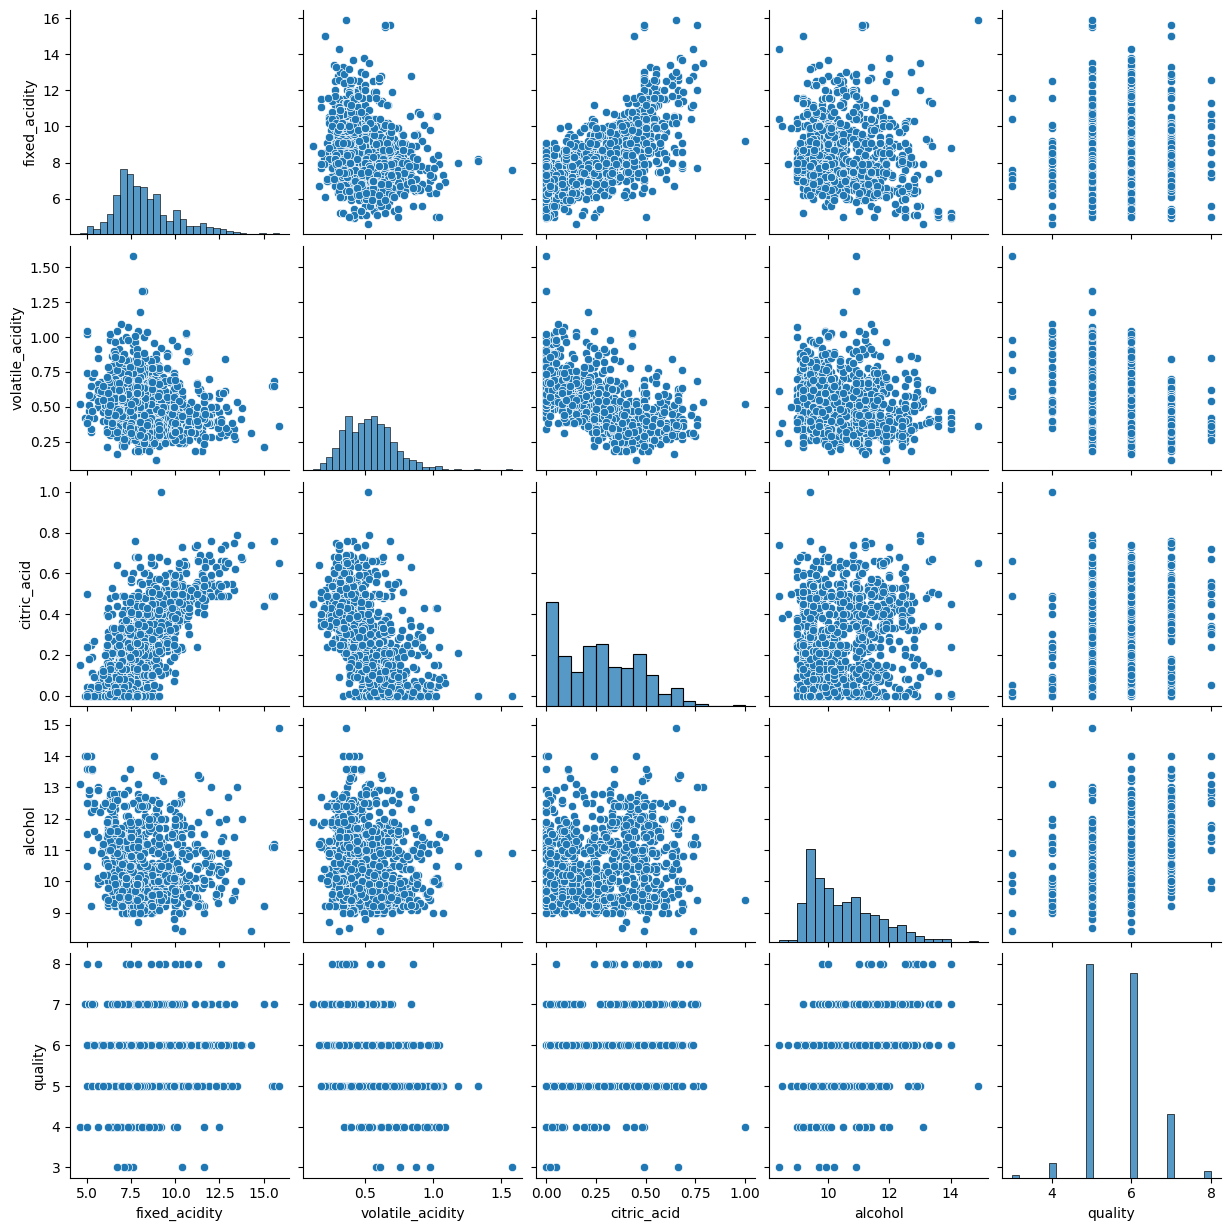

In [26]:
sns.pairplot(df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'alcohol', 'quality']])
plt.show()

##Model Exploration

In [27]:
from sklearn.metrics import mean_squared_error
#set quality to target var
y = df['quality']

#calculate mean value of quality
mean_quality = y.mean()

#predict mean value of quality
baseline_predictions = np.full(shape=y.shape, fill_value=mean_quality)

#calculate MSE for zero effort baseline
baseline_mse = mean_squared_error(y, baseline_predictions)

print(f"Baseline MSE by Guessing Average {baseline_mse}")


Baseline MSE by Guessing Average 0.6487846062111878


In [28]:
print('Mean Quality:',mean_quality)

Mean Quality: 5.657042869641295


##Baseline Model (Zero Effort)
This model, which predicts the mean quality for every observation, has an MSE of about 0.6488.

We will first ensure that one of the models, Linear Regression, Ridege, Lasso, or Decision Tree have a lower MSE that the baseline zero effort model of predicting the average for every observation.  



In [29]:
#setting global random state
random_state = 42

<!-- ##Exploring Feature Importance -->

##Model Exploration
Attempting to minimize MSE, testing a variety of models, Lasso, Ridge, Decision Tree Regressor.


In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Global setting of X and y (Do not change)
X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']

#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

models =  [ (LinearRegression, {}),
            (Ridge, {'alpha':0.1}),
            (Lasso, {'alpha':0.1}),
            (DecisionTreeRegressor, {'max_depth':3}),
            (RandomForestRegressor, {'n_estimators':100, 'max_depth':5}),
            (GradientBoostingRegressor, {'n_estimators':100, 'max_depth':3}) ]

for Model, args in models:
    # instantiate and unpack parameters
    model = make_pipeline( StandardScaler(), Model(**args))
    model.fit(X_train, y_train)                       # fit
    y_pred = model.predict(X_test)               # predict
    mse = mean_squared_error(y_test, y_pred)      # evaluate
    print('%s: %s' % (Model.__name__, mse))

LinearRegression: 0.38003245026277516
Ridge: 0.3800172629509073
Lasso: 0.38211817621052274
DecisionTreeRegressor: 0.4432667263401456
RandomForestRegressor: 0.33187084108208953
GradientBoostingRegressor: 0.32587451188735617


LinearRegression: 0.38003245026277516
Ridge: 0.3800172629509073
Lasso: 0.38211817621052274
DecisionTreeRegressor: 0.4432667263401456
RandomForestRegressor: 0.3346140879403056
GradientBoostingRegressor: 0.32813415535963997


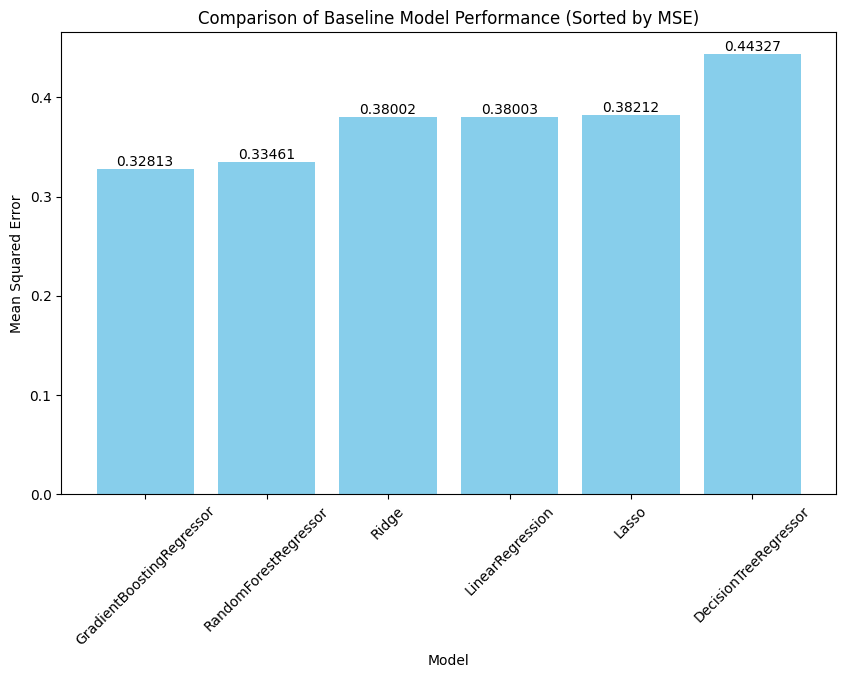

In [31]:
import matplotlib.pyplot as plt
# Initialize lists to store MSE values and model names
mse_values = []
model_names = []

for Model, args in models:
    model = make_pipeline(StandardScaler(), Model(**args))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    model_names.append(Model.__name__)
    print('%s: %s' % (Model.__name__, mse))

# Sort the models by MSE
sorted_indices = sorted(range(len(mse_values)), key=lambda k: mse_values[k])
mse_values = [mse_values[i] for i in sorted_indices]
model_names = [model_names[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mse_values, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Baseline Model Performance (Sorted by MSE)')
plt.xticks(rotation=45)
plt.show()


Linear Regression Model: This model takes into account all present features in the data set and achieves an MSE of about 0.3856. This is significantly lower than the baseline MSE. This indicates that the regression model is more effective in predicting wine quality than the zero effor approach.

The Ridge, Lasso, and Decision Tree Regressor Models also all fall below the baseline zero effort model with MSE values of ~ .3800, .3821, and .4432 respectively.

##Linear Regression Model Tuning & Feature Importance


In [32]:
#baseline MSE using linear regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#set x and y vars
X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']

#split data, using 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#initilize linear regression model
model = LinearRegression()

#train model
model.fit(X_train, y_train)

#predict on test set
y_pred = model.predict(X_test)

#calculate mse
mse = mean_squared_error(y_test, y_pred)

#print results
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.3800324502627761


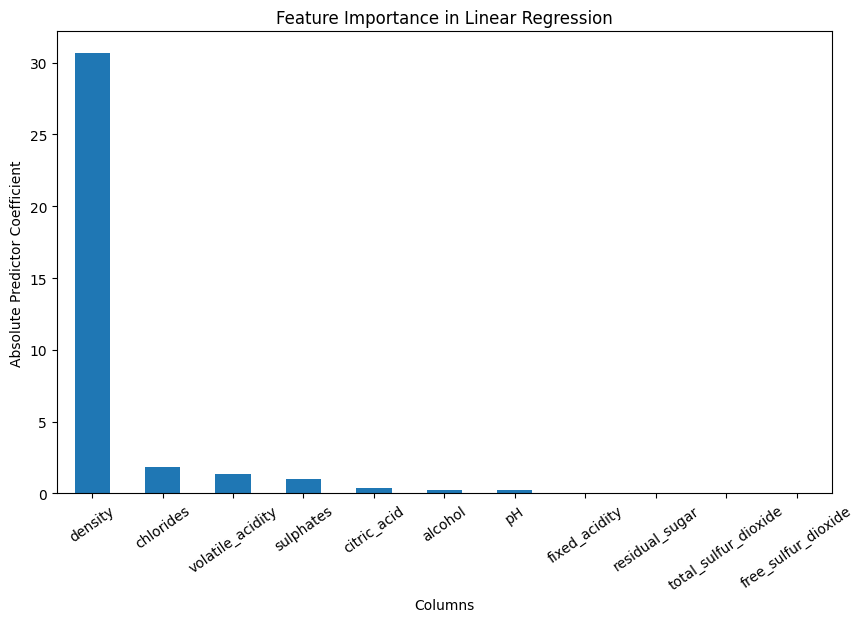

In [33]:
# get featrue names and coefficients
feature_importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])

# Sort the features by absolute value of their coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
sorted_features = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_features['Abs_Coefficient'].plot(kind='bar')
plt.xticks(rotation = 35)
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Absolute Predictor Coefficient')
plt.show()


In [34]:
feature_importance

,Coefficient,Abs_Coefficient
fixed_acidity,0.051343,0.051343
volatile_acidity,-1.336257,1.336257
citric_acid,-0.339101,0.339101
residual_sugar,0.004121,0.004121
chlorides,-1.806530,1.806530
free_sulfur_dioxide,0.001881,0.001881
total_sulfur_dioxide,-0.002283,0.002283
density,-30.653256,30.653256
pH,-0.249236,0.249236
sulphates,0.973040,0.973040


In [35]:
sorted_features

,Coefficient,Abs_Coefficient
density,-30.653256,30.653256
chlorides,-1.806530,1.806530
volatile_acidity,-1.336257,1.336257
sulphates,0.973040,0.973040
citric_acid,-0.339101,0.339101
alcohol,0.266586,0.266586
pH,-0.249236,0.249236
fixed_acidity,0.051343,0.051343
residual_sugar,0.004121,0.004121
total_sulfur_dioxide,-0.002283,0.002283


Since the following columns; 'fixed_acidity','residual_sugar','total_sulfur_dioxide','free_sulfur_dioxide', have low coefficient values, we will iteratively drop each predictor from the linear regression model, starting the the predictor with the lowest absolute coefficient value to attmept to imporve the performance of the model and decrease the MSE.

Additionally, we will explore adding polynomial features to alcohol as we would expect that alcohol content of a wine would have an impact on its quality.

In [36]:
#baseline MSE using linear regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#set x and y vars
X = df[[                       #quality and ID removed. Removing bottom 4 features based on sorted feature coefficients
        # 'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        # 'residual_sugar',
        'chlorides',
        # 'free_sulfur_dioxide',
        # 'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#split data, using 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#initilize linear regression model
model = LinearRegression()

#train model
model.fit(X_train, y_train)

#predict on test set
y_pred = model.predict(X_test)

#calculate mse
mse = mean_squared_error(y_test, y_pred)

#print results
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.3827616148521948


In [37]:
#Linear Regression model with one polynomial feature transformation
from sklearn.preprocessing import PolynomialFeatures

X = df[[                       #quality and ID removed.
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#create a Polynomial Feature for the 'alcohol' column
poly = PolynomialFeatures(degree=2, include_bias=False)
alcohol_squared = poly.fit_transform(df[['alcohol']])[:,1]

# Add the new polynomial feature to the DataFrame
X['alcohol_squared'] = alcohol_squared

# Split data, using 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Initialize linear regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate MSE on test
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.37443439568953285


<ipython-input-37-c74acf7d09e6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['alcohol_squared'] = alcohol_squared


In [38]:
#Linear Regression model with two polynomial feature transformations
X = df[[                       #quality and ID removed.
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#create a Polynomial Feature for the 'alcohol' column
poly2 = PolynomialFeatures(degree=2, include_bias=False)
alcohol_squared = poly2.fit_transform(df[['alcohol']])[:,1]

poly3 = PolynomialFeatures(degree=3, include_bias=False)
residual_sugar_cubed = poly3.fit_transform(df[['residual_sugar']])[:,1]


# Add the new polynomial feature to the DataFrame
X['alcohol_squared'] = alcohol_squared
X['residual_sugar_cubed'] = residual_sugar_cubed

# Split data, using 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Initialize linear regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate MSE on test
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.3751600594706347


<ipython-input-38-d8762550c5ae>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['alcohol_squared'] = alcohol_squared


##Linear Regression Model Results
The best linear regression model we achieved was through the use of a polynomial feature transformation. At first, we attempted to drop four features with the lowest coefficeints; however, this did not decrease our MSE. Our next attempt to further tune the model was done by adding a polynomial square transformation to the alcohol predictor. We would expect that the alcohol content of a wine would have a material impact on whether or not the wine was scored a high or low quality. We hypothesized that by adding a polynomial feature transformation we would better represent the data. The lowest MSE we achieved on the testing set for our linear regression model was 0.37443439568953285, which was achieved by using a single 2 degree feature transformation on the alcohol predictor.

##Ridge Model Tuning

In [39]:
#Ridge Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#set x and y
X = df[[                       #quality and ID removed
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#instantiate model
model_ridge = Ridge(random_state=random_state)

#fit model
model_ridge.fit(X_train, y_train)

#predict on test set
y_pred_ridge = model_ridge.predict(X_test)

#evaulate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_ridge

0.37341134599577736

In [40]:
#ridge regression with cross validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

#set x and y
X = df[[                       #quality and ID removed
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Range of alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model with cross-validation
model_ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
model_ridge_cv.fit(X_train, y_train)

# Extract the best alpha value
best_alpha = model_ridge_cv.alpha_
print(f"Best alpha value: {best_alpha}")

# Extract the lowest training CV MSE score
lowest_cv_mse = np.min(model_ridge_cv.cv_values_.mean(axis=0))
print(f"Lowest training CV MSE score: {lowest_cv_mse}")

# Re-fit the Ridge model with the best alpha value
model_ridge_best = Ridge(alpha=best_alpha)
model_ridge_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best_ridge = model_ridge_best.predict(X_test)

# Evaluate the model on the test data
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Mean Squared Error with best alpha on test data: {mse_best_ridge}")


Best alpha value: 0.1
Lowest training CV MSE score: 0.4273632613195575
Mean Squared Error with best alpha on test data: 0.3776091437610548


In [41]:
#ridge cv regression w/polynomial feature transformation on alcohol
# Original DataFrame features
X = df[[
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']


# Create a Polynomial Feature for the 'alcohol' column
poly = PolynomialFeatures(degree=3, include_bias=False)
alcohol_squared = poly.fit_transform(df[['alcohol']])[:,1]  # Select only the squared term

# Add the new polynomial feature to the DataFrame
X['alcohol_squared'] = alcohol_squared

#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Range of alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model with cross-validation
model_ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
model_ridge_cv.fit(X_train, y_train)

# Extract the best alpha value
best_alpha = model_ridge_cv.alpha_
print(f"Best alpha value: {best_alpha}")

# Extract the lowest training CV MSE score
lowest_cv_mse = np.min(model_ridge_cv.cv_values_.mean(axis=0))
print(f"Lowest training CV MSE score: {lowest_cv_mse}")

# Re-fit the Ridge model with the best alpha value
model_ridge_best = Ridge(alpha=best_alpha)
model_ridge_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best_ridge = model_ridge_best.predict(X_test)

# Evaluate the model on the test data
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Mean Squared Error with best alpha on test data: {mse_best_ridge}")



Best alpha value: 0.1
Lowest training CV MSE score: 0.42769679060046295
Mean Squared Error with best alpha on test data: 0.3726249336824337


<ipython-input-41-e496dded88ec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['alcohol_squared'] = alcohol_squared


Best alpha value: 0.1


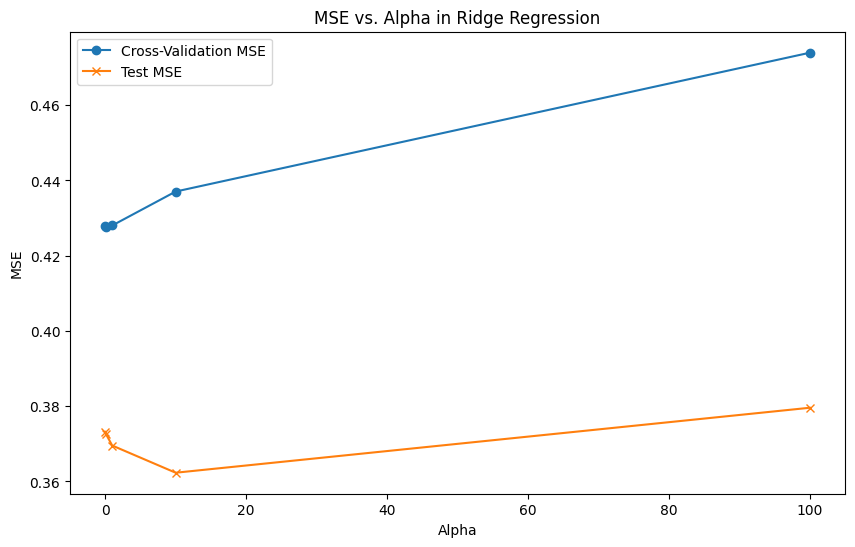

In [42]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Fit the Ridge model with cross-validation and extract the best alpha value
model_ridge_cv.fit(X_train, y_train)
best_alpha = model_ridge_cv.alpha_
print(f"Best alpha value: {best_alpha}")

# Extract the MSE for each alpha during cross-validation
cv_mse_values = model_ridge_cv.cv_values_.mean(axis=0)

# Calculate test set MSE for each alpha
test_mse_values = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_mse_values.append(mse)

# Plotting Cross-Validation and Test MSE for each alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_mse_values, marker='o', label='Cross-Validation MSE')
plt.plot(alphas, test_mse_values, marker='x', label='Test MSE')
plt.xscale('linear')  # Alphas vary in orders of magnitude
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha in Ridge Regression')
plt.legend()
plt.show()


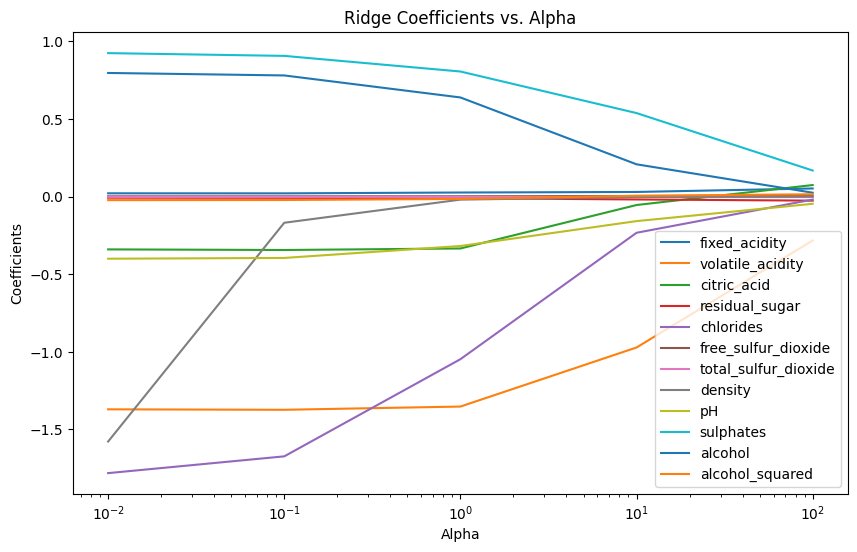

In [43]:
# Array to store the coefficients for each alpha
coefficients = []

# Fit a Ridge model and record the coefficients for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coefficients.append(model.coef_)

# Convert the list of coefficients into a NumPy array for easy plotting
coefficients = np.array(coefficients)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each coefficient's change over alphas
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients vs. Alpha')
plt.legend()
plt.show()


Ridge Regression Model Results Conclusion:
The best performing Ridge Regression model was found with an alpha value of 0.1. Cross-validation on the training set yielded an MSE of approximately 0.428, and the application of the optimal alpha on the test data resulted in an MSE of 0.373, demonstrating a balance between bias and variance and indicating a generalizable model with a good fit to the data.

##Lasso Model Tuning

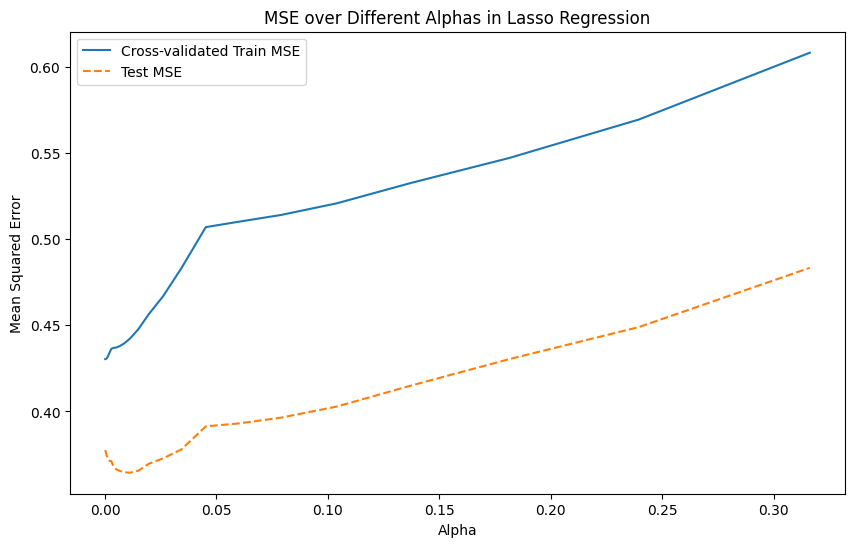

Lowest CV Train MSE: 0.4303585079451905
Optimal Alpha: 0.00013203517797162948
Test Set MSE with Optimal Alpha: 0.37752787208137717


In [44]:
#lasso model - best alpha exploration
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Original DataFrame features
X = df[[
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

# Train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Defined range of alphas
alphas = np.logspace(-4, -0.5, 30)

# Empty lists to store mean of cross-validated MSE for training and test MSE
cv_train_mse = []
test_mse = []

# For loop to iterate over alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000, random_state=random_state)

    # Perform cross-validation
    scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_train_mse.append(-np.mean(scores))

    # Fit the model and compute test MSE
    lasso.fit(X_train, y_train)
    y_test_pred = lasso.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_pred))

#plot
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_train_mse, label='Cross-validated Train MSE')
plt.plot(alphas, test_mse, label='Test MSE', linestyle='--')
plt.xscale('linear')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Different Alphas in Lasso Regression')
plt.legend()
plt.show()

# Finding the optimal alpha value using the train set
min_cv_mse = min(cv_train_mse)
optimal_alpha_cv = alphas[cv_train_mse.index(min_cv_mse)]

print(f"Lowest CV Train MSE: {min_cv_mse}")
print(f"Optimal Alpha: {optimal_alpha_cv}")

# Test MSE for the optimal alpha
optimal_test_mse = test_mse[cv_train_mse.index(min_cv_mse)]
print(f"Test Set MSE with Optimal Alpha: {optimal_test_mse}")


Lasso Regression Model Results Conclusion:
The optimal parameters for the Lasso Regression were achieved with an alpha value of 0.1 and an MSE of 0.366 on the test set. This suggests that the Lasso model, which performs feature selection as part of its optimization, was able to identify a subset of features that contribute most significantly to predicting wine quality, thus resulting in a relatively low error.

##Gradient Boosting Model & Fine Tuning

In [45]:
#gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Original DataFrame features
X = df[[
        'fixed_acidity',
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]]
y = df['quality']

#train test split using 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, alpha=0.5, random_state=random_state)

#perform cross validation on training set, 5 fold
cv_scores_gbr = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

#calcualte average cross validated score
cv_mse_gbr = -cv_scores_gbr.mean()
print(f"Cross-validated MSE for Gradient Boosting on Training Set: {cv_mse_gbr}")

#train and evaluate model on test set
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
test_mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Test Set MSE for Gradient Boosting: {test_mse_gbr}")


Cross-validated MSE for Gradient Boosting on Training Set: 0.42776704140208277
Test Set MSE for Gradient Boosting: 0.32972226991334685


Lowest Test MSE: 0.3292582572493039
Achieved at iteration: 99


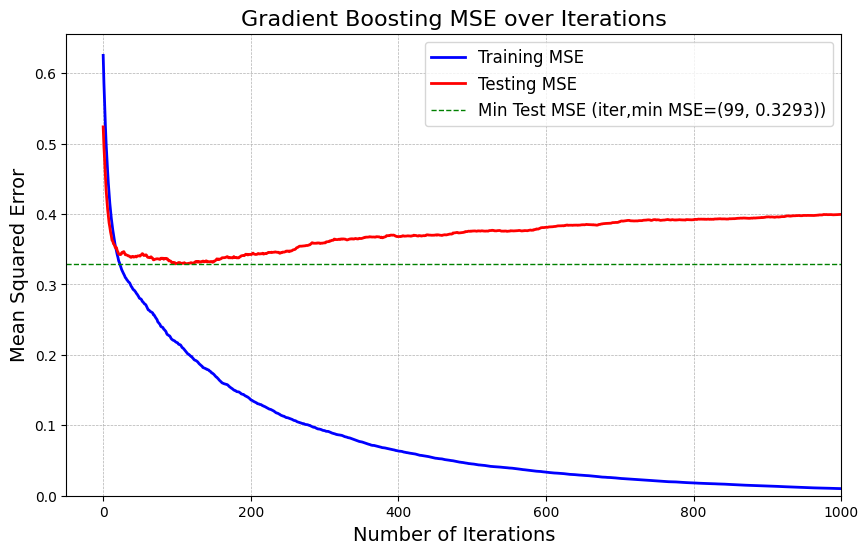

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']
#train test split using 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Initialize and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=random_state)
gbr.fit(X_train, y_train)

# Calculate MSE at each stage of training
train_mse = [mean_squared_error(y_train, y_pred) for y_pred in gbr.staged_predict(X_train)]
test_mse = [mean_squared_error(y_test, y_pred) for y_pred in gbr.staged_predict(X_test)]

# Find the minimum test MSE and its corresponding iteration
min_mse = min(test_mse)
min_mse_iter = test_mse.index(min_mse)
print(f"Lowest Test MSE: {min_mse}")
print(f"Achieved at iteration: {min_mse_iter + 1}")  # +1 because iteration starts at 0

#plotting the training and testing errors over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE', color='blue', linewidth=2)
plt.plot(test_mse, label='Testing MSE', color='red', linewidth=2)
plt.title('Gradient Boosting MSE over Iterations', fontsize=16)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
# plt.plot([min_mse_iter, min_mse_iter], [0, min_mse], color='green', linestyle='-', linewidth=1) #vertical line
plt.axhline(y=min_mse, color='green', linestyle='--', label=f'Min Test MSE (iter,min MSE={min_mse_iter + 1, round(min_mse,4)})', linewidth=1) #horizontal line at min MSE
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-50, len(train_mse))
plt.ylim(0)


plt.show()

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'alpha': 0.1, 'learning_rate': 0.01}
Lowest CV MSE: 0.4193781555879818
Test MSE of the best model: 0.32949532603499304


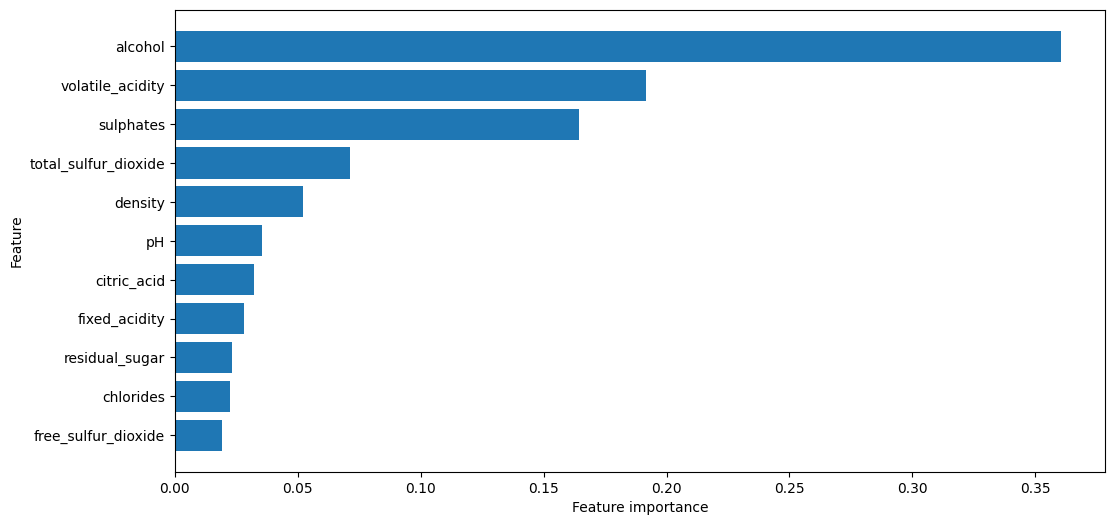

Lowest Test MSE: 0.3292582572493039
Achieved at iteration: 99


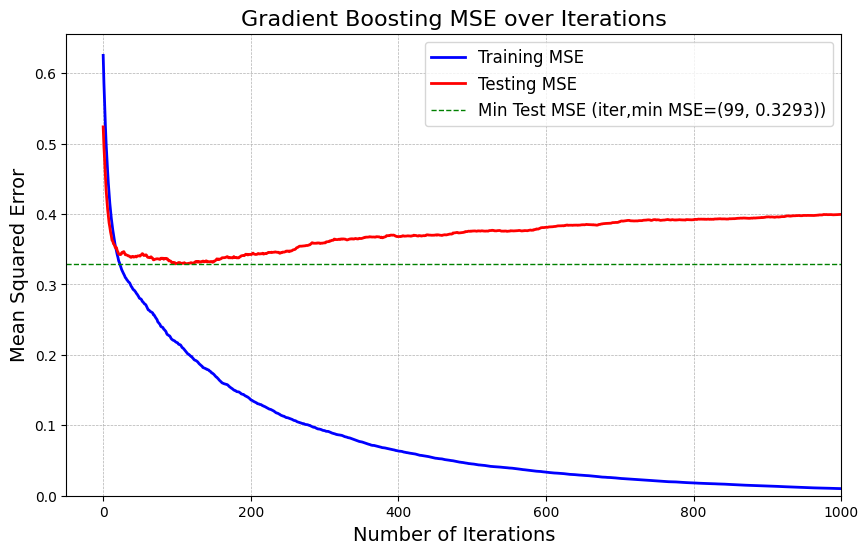

In [47]:
#optimizing gradient boosting regression with gridsearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']
#train test split using 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#set up the parameters for cross-validation
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'alpha': [.1,.3,.5,.7,.9]
}

#initialize and set up GridSearchCV with cross validation
cv_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=1000, random_state=random_state, alpha=param_grid),
                      param_grid=param_grid,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      verbose=1,
                      )

#fit the model
cv_gbr.fit(X_train, y_train)

#get best model
best_gbr = cv_gbr.best_estimator_

#print best parameters and corresponding MSE
print(f"Best parameters: {cv_gbr.best_params_}")
print(f"Lowest CV MSE: {-cv_gbr.best_score_}")

#predict using the best model and calculate MSE
y_test_pred = best_gbr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

#print test set MSE
print(f"Test MSE of the best model: {mse_test}")

#get feature importance and sort
feature_importances = best_gbr.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(X.columns)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

# Find the minimum test MSE and its corresponding iteration
min_mse = min(test_mse)
min_mse_iter = test_mse.index(min_mse)


#plotting the training and testing errors over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE', color='blue', linewidth=2)
plt.plot(test_mse, label='Testing MSE', color='red', linewidth=2)
plt.title('Gradient Boosting MSE over Iterations', fontsize=16)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
# plt.plot([min_mse_iter, min_mse_iter], [0, min_mse], color='green', linestyle='-', linewidth=1) #vertical line
plt.axhline(y=min_mse, color='green', linestyle='--', label=f'Min Test MSE (iter,min MSE={min_mse_iter + 1, round(min_mse,4)})', linewidth=1) #horizontal line at min MSE
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-50, len(train_mse))
plt.ylim(0)
print(f"Lowest Test MSE: {min_mse}")
print(f"Achieved at iteration: {min_mse_iter + 1}")  # +1 because iteration starts at 0


Gradient Boosting Model Results Conclusion:
The Gradient Boosting model showed a significant improvement in performance with the lowest test MSE of approximately 0.329, which was achieved after 99 iterations. This indicates that the ensemble method of Gradient Boosting is effective in handling the complex relationships in the data by combining multiple weak learners to form a strong predictive model.

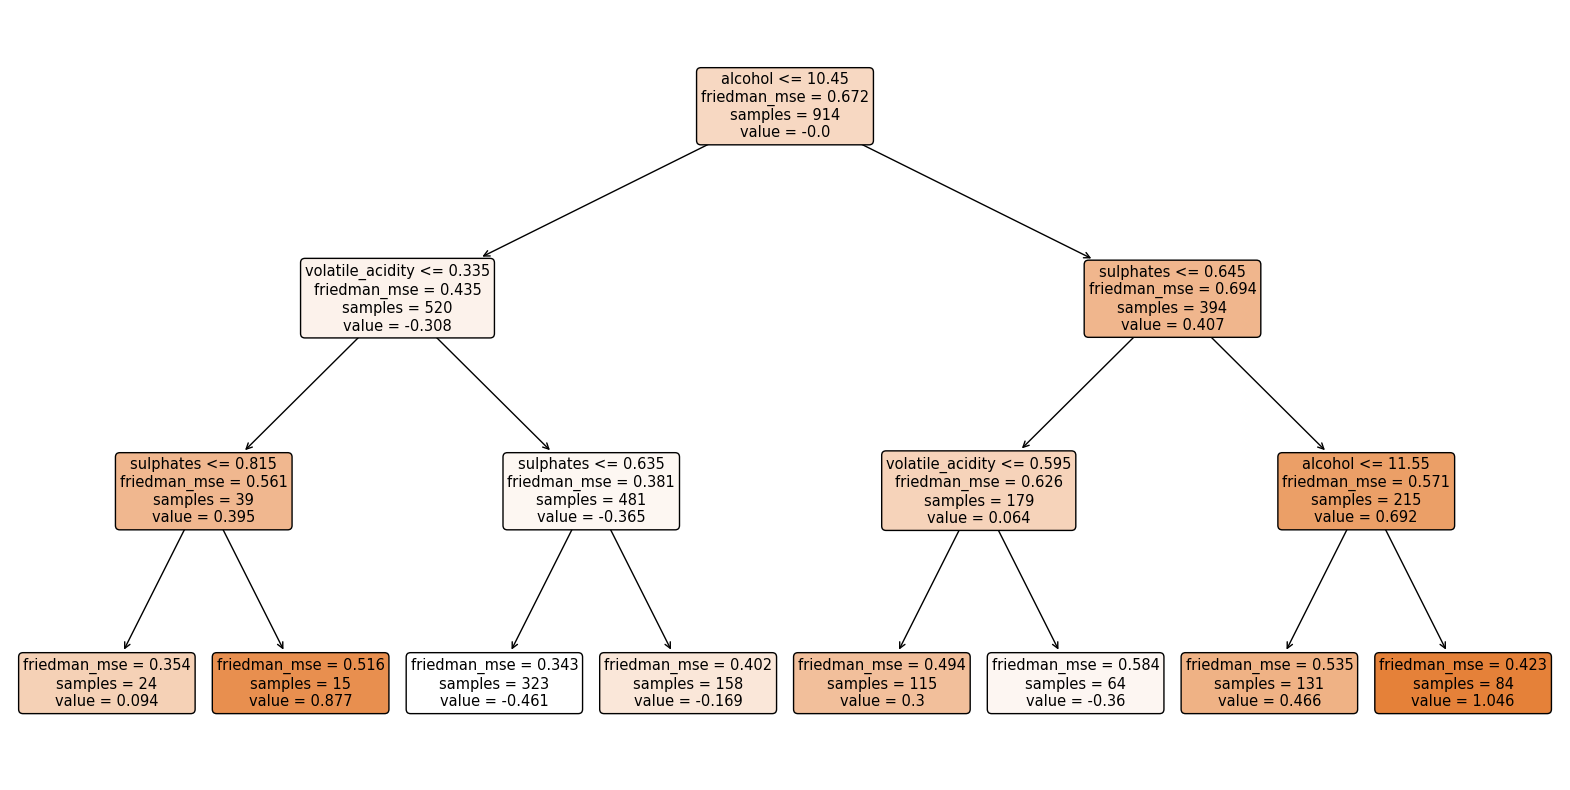

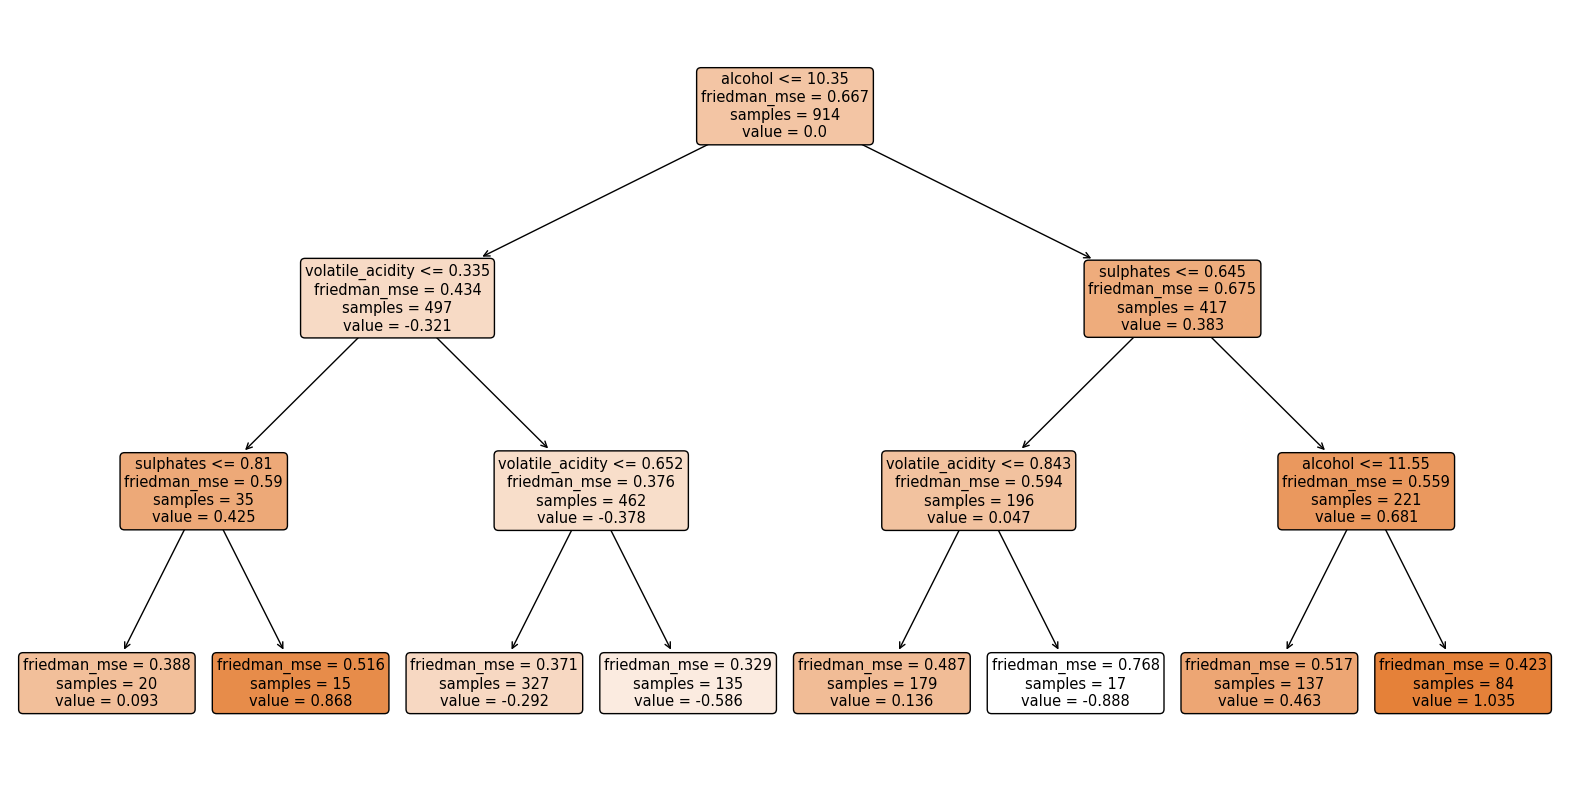

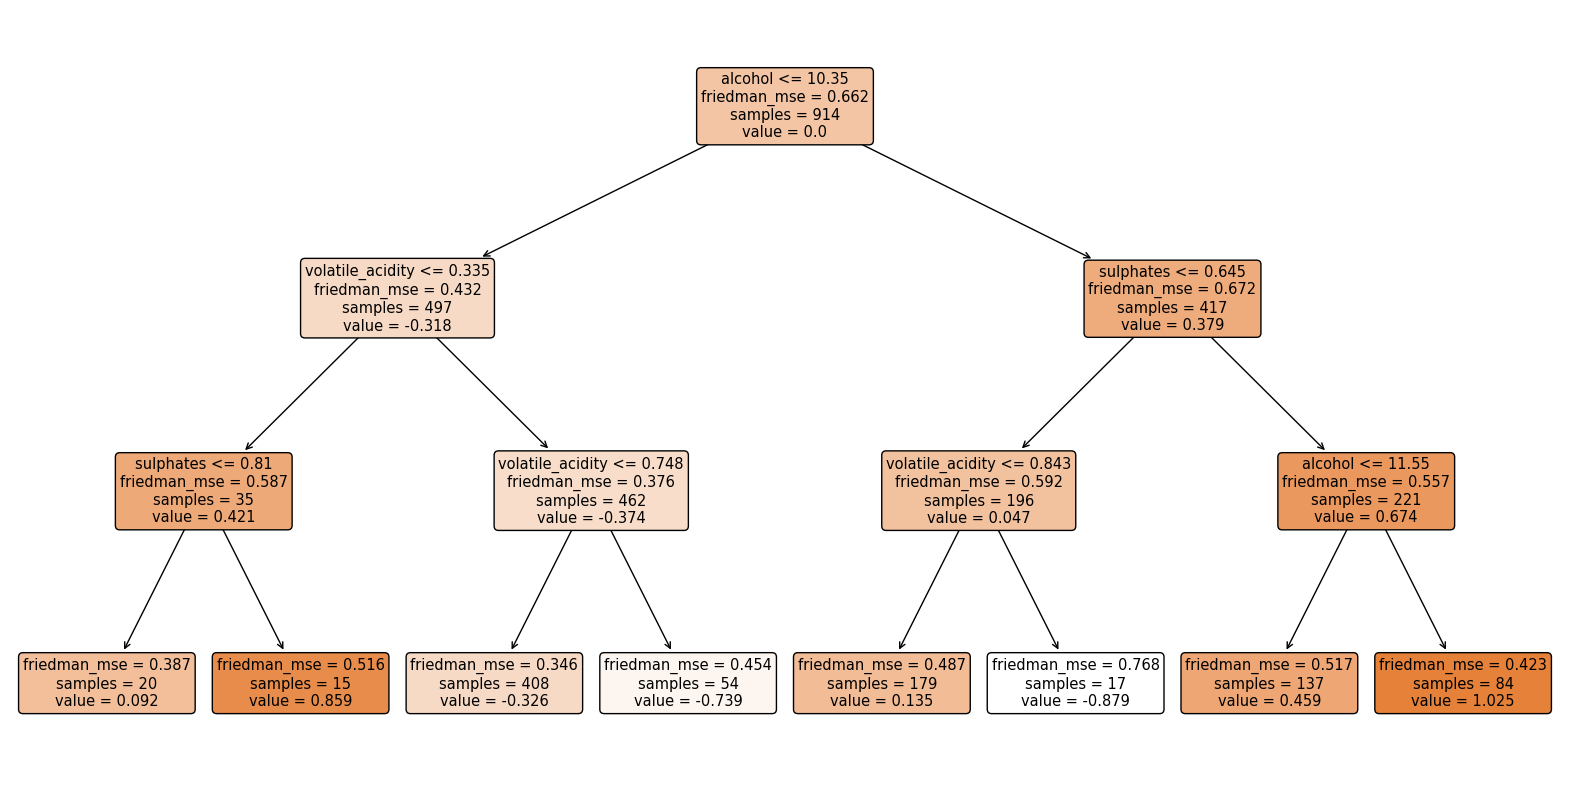

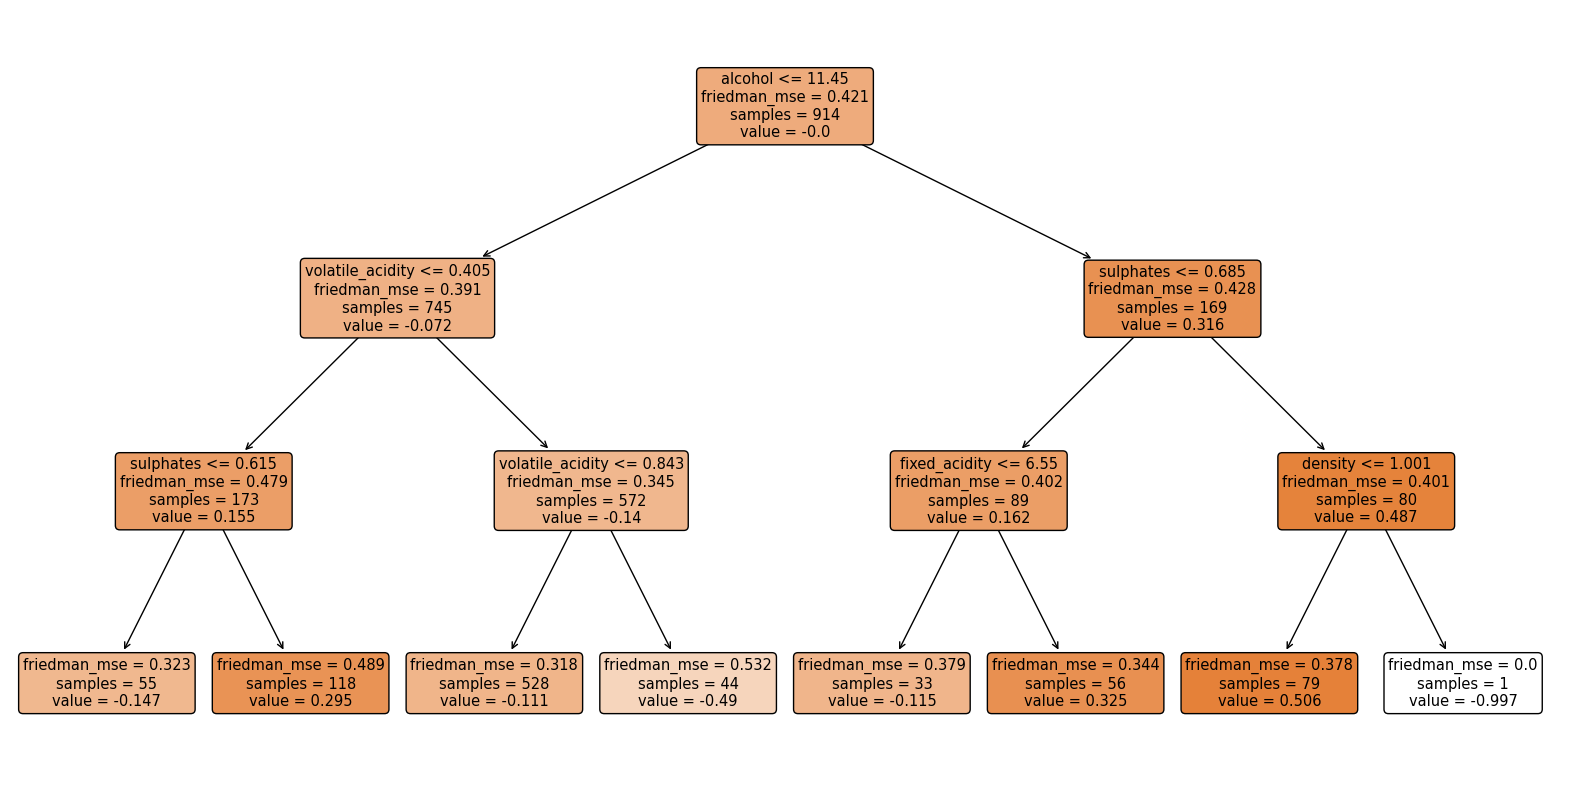

In [48]:
from sklearn.tree import plot_tree

# Select the tree 0 , 1, and 99 from the best model

trees = [best_gbr.estimators_[0,0], best_gbr.estimators_[1,0], best_gbr.estimators_[2,0], best_gbr.estimators_[99,0] ]
for tree in trees:
  plt.figure(figsize=(20, 10))
  plot_tree(tree,
            feature_names=X.columns,
            filled=True,
            rounded=True,
            max_depth=3)
  plt.show()

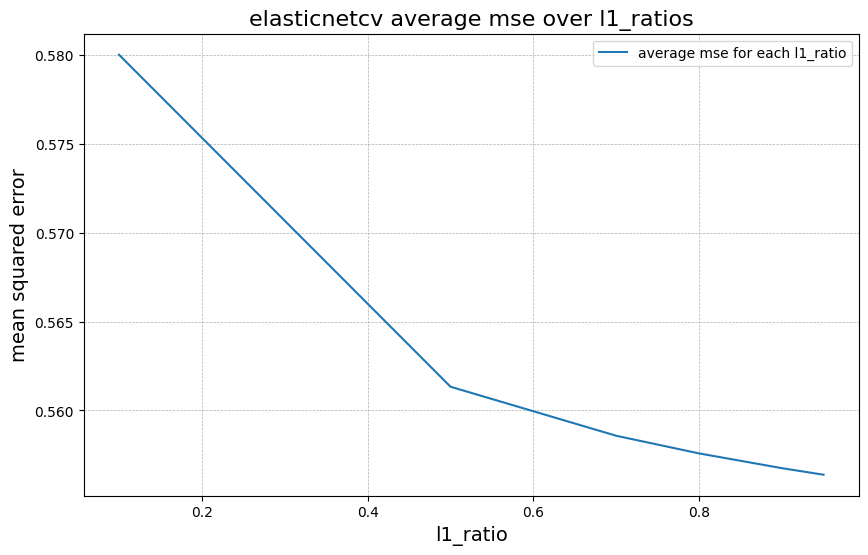

optimal alpha: 0.004874090598319465
optimal l1 ratio: 0.95
train mse: 0.4260141135095143
test mse: 0.36654651444767206


In [49]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']

#train test split using 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#list of l1_ratios to try
l1_ratios = [0.1, 0.5, 0.7, 0.8, 0.9, .95]

#initialize and fit the elasticnetcv
elnet_cv = ElasticNetCV(l1_ratio=l1_ratios, cv=5, n_alphas=100, random_state=42)
elnet_cv.fit(X_train, y_train)

#predict and calculate mse on the train and test set
y_train_pred = elnet_cv.predict(X_train)
y_test_pred = elnet_cv.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#calculate the average mse for each l1_ratio
average_mse = np.mean(elnet_cv.mse_path_, axis=(1, 2))

#plotting the average mse for each l1_ratio
plt.figure(figsize=(10, 6))
plt.plot(l1_ratios, average_mse, label='average mse for each l1_ratio')
plt.title('elasticnetcv average mse over l1_ratios', fontsize=16)
plt.xlabel('l1_ratio', fontsize=14)
plt.ylabel('mean squared error', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#print the optimal alpha - the mse on both the train and test set - and the optimal l1 ratio
print(f"optimal alpha: {elnet_cv.alpha_}")
print(f"optimal l1 ratio: {elnet_cv.l1_ratio_}")
print(f"train mse: {train_mse}")
print(f"test mse: {test_mse}")


In [50]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X = df[['fixed_acidity', #quality and ID removed
        'volatile_acidity',
        'citric_acid',
        'residual_sugar',
        'chlorides',
        'free_sulfur_dioxide',
        'total_sulfur_dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]
y = df['quality']

# train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model with StandardScaler in a pipeline
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
scaler = StandardScaler()
model = make_pipeline(scaler, svr)

# Define a grid of hyperparameter values
param_grid = {'svr__C': [1, 10, 100, 1000],
              'svr__gamma': [0.01, 0.1, 1, 10],
              'svr__epsilon': [0.01, 0.1, 1, 10]}

# Use GridSearchCV to perform cross validation and find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the training set
yhat_train = best_model.predict(X_train)

# Calculate MSE
mse_train = mean_squared_error(y_train, yhat_train)
print("Train MSE of the Best Model on Validation Set:", mse_train)


Best Hyperparameters: {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 0.1}
Train MSE of the Best Model on Validation Set: 0.29296695642120124


In [51]:
# Evaluate model on test set
yhat_test = best_model.predict(X_test)

# Calculate test MSE
mse_test = mean_squared_error(y_test, yhat_test)
print("Test MSE of the Best Model on Validation Set:", mse_test)

Test MSE of the Best Model on Validation Set: 0.2989380325022597


Support Vector Regression (SVR) Model Results Conclusion:
The SVR model optimized its hyperparameters to C=1, epsilon=0.1, and gamma=0.1, which yielded the best performance on the validation set with a train MSE of approximately 0.293 and a test MSE of 0.299. This demonstrates the model's capability to capture the dataset's nuances and suggests that SVR, with the right parameters, can effectively model the wine quality dataset.


In summary, across different models, we see varying degrees of success in minimizing the MSE, which is indicative of their predictive capabilities. The models that included regularization or more complex transformations (like Gradient Boosting and SVR) tended to perform better, suggesting that the quality of wine is a complex phenomenon that is best captured with sophisticated modeling techniques